
# Obter os dados


In [ ]:
import pandas as pd

In [ ]:
#df = pd.read_csv(datasets_path.joinpath('skills_dataset.txt'), sep=';', error_bad_lines=False)
df = pd.read_csv('https://raw.githubusercontent.com/amiapmorais/rpgai/main/skills_dataset.txt', sep=';', error_bad_lines=False)
df.head()

b'Skipping line 9: expected 3 fields, saw 4\nSkipping line 197: expected 3 fields, saw 4\nSkipping line 201: expected 3 fields, saw 4\nSkipping line 202: expected 3 fields, saw 4\nSkipping line 248: expected 3 fields, saw 4\nSkipping line 269: expected 3 fields, saw 4\nSkipping line 299: expected 3 fields, saw 4\nSkipping line 346: expected 3 fields, saw 4\nSkipping line 355: expected 3 fields, saw 4\nSkipping line 356: expected 3 fields, saw 4\nSkipping line 399: expected 3 fields, saw 4\nSkipping line 401: expected 3 fields, saw 4\nSkipping line 402: expected 3 fields, saw 5\nSkipping line 403: expected 3 fields, saw 4\nSkipping line 405: expected 3 fields, saw 4\nSkipping line 422: expected 3 fields, saw 4\nSkipping line 423: expected 3 fields, saw 4\nSkipping line 449: expected 3 fields, saw 4\nSkipping line 454: expected 3 fields, saw 4\nSkipping line 479: expected 3 fields, saw 4\nSkipping line 488: expected 3 fields, saw 4\nSkipping line 491: expected 3 fields, saw 4\nSkipping l

skill  ...                                      backward_text
0      Nature  ...  She looks back from the inside and goes-- He t...
1      Nature  ...  Error 404! The lip quiver. (laughter) She look...
2      Nature  ...  (laughter) She looks back and goes, "There's a...
3  Persuasion  ...  I'll help Beau! Yeah, I know, it's funny how m...
4  Perception  ...  cool! That's old business. We've seen that one...

[5 rows x 3 columns]

In [ ]:
df.sample().values[0]

array(['Arcana', 'MATT: Make an arcana check.',
       "and wares back into the Empire. I just don't want to bring a cart with a magical tarp over it, that's designed for smuggling humans. Well, the tarp isn't magical. The cart is magical. Is there a way to turn off the effect? It just looks like a cart. It needs to be empty the way it looks when they poke at it. So I think we should all spill out now. We'll walk outside? Yeah. There's got to be a way to turn off the enchantment, maybe."],
      dtype=object)

In [ ]:
# Remove a percepção porque tinha mais de 1300
#df = df[df.skill != 'Perception']

In [ ]:
#Apenas com dados do critical role
df.groupby('skill').count()

check_line  backward_text
skill                                     
Acrobatics              230            230
Animal Handling          26             26
Arcana                  147            147
Athletics               362            362
Deception               219            219
History                  88             88
Insight                 432            432
Intimidation            109            109
Investigation           620            620
Medicine                 90             90
Nature                  174            174
Perception             1383           1383
Performance              43             43
Persuasion              330            330
Religion                103            103
Sleight of Hand          55             55
Stealth                 591            590
Survival                 96             96

In [ ]:
import plotly.graph_objects as go
grafico_label = go.Figure()
grafico_label.add_trace(go.Histogram(histfunc="count",  x=df['skill']))
grafico_label

## Obtendo as ações da planilha

In [ ]:
df_actions = pd.read_csv('https://raw.githubusercontent.com/amiapmorais/rpgai/main/SkillDB-csv.csv', error_bad_lines=False)
df_actions.head()

skill  check_line                                      backward_text
0  Acrobatics         NaN        Freeing yourself from grapples and the like
1  Acrobatics         NaN  Squeezing through tight spaces without losing ...
2  Acrobatics         NaN  Balancing on thin/fragile surfaces without fal...
3  Acrobatics         NaN                  Landing on your feet after a fall
4  Acrobatics         NaN  Ignoring falling damage, such as falling from ...

In [ ]:
# Seleciona origem do treinamento
df['origem'] = 'CR'
df_actions['origem'] = 'RR'
df = df.append(df_actions, ignore_index=True)

In [ ]:
df_actions.groupby('skill').count()

check_line  backward_text
skill                                     
Acrobatics                0             13
Animal Handling           0             18
Arcana                    0             14
Athletics                 0             23
Deception                 0             13
History                   0             11
Insight                   0             12
Intimidation              0              7
Investigation             0              9
Medicine                  0             13
Nature                    0              9
Perception                0             10
Performance               0              8
Persuasion                0             11
Religion                  0              7
Sleight of Hand           0             10
Stealth                   0             10
Survival                  0             21

# Limpar os dados

In [ ]:
import spacy

In [ ]:
# Sem essa conversão, acontece um erro na hora de remover as stop words
df['backward_text'] = df['backward_text'].astype(str)
df['backward_text'] = df['backward_text'].str.lower()

In [ ]:
nlp = spacy.load("en_core_web_sm")

# remove palavras muito comuns
nlp.vocab["going"].is_stop = True
nlp.vocab["right"].is_stop = True
nlp.vocab["okay"].is_stop = True
nlp.vocab["yeah"].is_stop = True
nlp.vocab["want"].is_stop = True
nlp.vocab["try"].is_stop = True
nlp.vocab["gonna"].is_stop = True
nlp.vocab["good"].is_stop = True
nlp.vocab["yes"].is_stop = True
nlp.vocab["no"].is_stop = True
nlp.vocab["oh"].is_stop = True
nlp.vocab["look"].is_stop = True
nlp.vocab["know"].is_stop = True
nlp.vocab["way"].is_stop = True
nlp.vocab["looks"].is_stop = True
nlp.vocab["guy"].is_stop = True
nlp.vocab["little"].is_stop = True
nlp.vocab["check"].is_stop = True
nlp.vocab["thin"].is_stop = True
nlp.vocab["thing"].is_stop = True
nlp.vocab["guys"].is_stop = True
nlp.vocab["come"].is_stop = True


# remove nome dos players e personagens
nlp.vocab["jester"].is_stop = True
nlp.vocab["caleb"].is_stop = True
nlp.vocab["nott"].is_stop = True
nlp.vocab["fjord"].is_stop = True
nlp.vocab["yasha"].is_stop = True
nlp.vocab["beau"].is_stop = True
nlp.vocab["matt"].is_stop = True
nlp.vocab["sam"].is_stop = True
nlp.vocab["travis"].is_stop = True
nlp.vocab["marisha"].is_stop = True
nlp.vocab["ashley"].is_stop = True
nlp.vocab["laura"].is_stop = True
nlp.vocab["liam"].is_stop = True
nlp.vocab["professor"].is_stop = True
nlp.vocab["thaddeus"].is_stop = True
nlp.vocab["taliesin"].is_stop = True
nlp.vocab["mollymauk"].is_stop = True
nlp.vocab["grog"].is_stop = True
nlp.vocab["pike"].is_stop = True

#Removendo as stop words, pontuação e números. Depois concatenando tudo junto
for i,backward_text in df.iterrows():
  doc = nlp(backward_text['backward_text'])
  #Tokenize. cria um array com o texto dos tokens que não são Stop Words, pontuação ou números
  tokens = [token.text for token in doc if not token.is_stop | token.is_punct| token.text.isdigit()]

  df.at[i,'backward_text'] = ' '.join(tokens)


In [ ]:
import re

def clean_text(text):
  
  text_return = re.sub(r"[^a-z]", ' ', text) # keep only words
  text_return = re.sub(r"\b[a-z]{1,2}\b", ' ', text_return) # remove <2 characters
  return text_return

df['backward_text'] = df['backward_text'].apply(clean_text)


In [ ]:
df

skill  ... origem
0         Nature  ...     CR
1         Nature  ...     CR
2         Nature  ...     CR
3     Persuasion  ...     CR
4     Perception  ...     CR
...          ...  ...    ...
5312   Athletics  ...     RR
5313   Athletics  ...     RR
5314   Athletics  ...     RR
5315   Athletics  ...     RR
5316   Athletics  ...     RR

[5317 rows x 4 columns]

In [ ]:
# Amostra estratificada com reposição >> Risco de viciar o modelo
df_estrat = df.groupby('skill').apply(pd.DataFrame.sample, n=300, replace=True).reset_index(drop=True)

# Descomentar quando a massa de dados tiver mais que 300 exemplos de cada skill
#df_estrat = df.groupby('skill').apply(pd.DataFrame.sample, n=300).reset_index(drop=True)

In [ ]:
df.sample().values[0]

array(['Persuasion', 'MATT: Make a persuasion check. Actually, no, make',
       'Oh yeah moments pass door opens tiny leather journal right soonest got here-- pulls soonest got here-- let months weeks days possible maybe quick emergency meeting emergency leave town Yeah come number months-- time sensitive dead'],
      dtype=object)

In [ ]:
# Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

X_train: 75% dos textos prévios ao teste
X_test: 25% dos labels da skills
y_train: 75% dos labels das skills
y_test: 25% dos labels das skills

In [ ]:
# Split dos dados em treino e validação
X_train, X_test, y_train, y_test = train_test_split(df_estrat['backward_text'], df_estrat['skill'], random_state = 0)

In [ ]:
#Adicionando as ações da planilha a base de treinamento
#X_train = X_train.append(df_actions['backward_text'])
#y_train = y_train.append(df_actions['skill'])

In [ ]:
# Bag of words
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

X_train_counts é uma matriz que representa quantas vezes cada uma das palavras apareceram no corpus, onde a quantidade de linhas do corpus é a quantidade de linhas da matriz e a quantidade de colunas é o tamanho do bag of words, e cada celula é a quantidade de vezes que a palavra que está na mesma posição do bag of words apareceu na linha do corpus em questão

In [ ]:
#ta muito zuado as features, não devia ter números
print(count_vect.get_feature_names())

['aah', 'aback', 'abandon', 'abandoned', 'abandoning', 'abdomen', 'abe', 'aberrations', 'abilities', 'ability', 'able', 'abode', 'abraham', 'abrasive', 'abs', 'absent', 'absolute', 'absolutely', 'absolve', 'absolved', 'absorb', 'abundant', 'abyss', 'accent', 'access', 'accessible', 'accessories', 'accident', 'accidentally', 'accompany', 'accomplished', 'accord', 'according', 'accounted', 'accoutrements', 'accrued', 'accurate', 'accusations', 'accuse', 'accused', 'accustomed', 'acid', 'acidic', 'acknowledge', 'acknowledged', 'acolytes', 'acquaintance', 'acquire', 'acquired', 'acrid', 'acrobatics', 'act', 'acting', 'action', 'actions', 'activate', 'active', 'actively', 'activity', 'actual', 'actually', 'adama', 'adamant', 'add', 'added', 'addicted', 'adding', 'addition', 'additional', 'addressing', 'adds', 'adhering', 'adhesive', 'adjacent', 'adjoining', 'adjust', 'adjusts', 'administer', 'administering', 'administers', 'administrating', 'administrator', 'admire', 'admit', 'adopted', 'ad

In [ ]:
# Transformando o bag of words em um tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
# Treinando o modelo
# pra treinar o modelo usa os 75% dos textos e dos labels, pra depois ele predizer
#clf = MultinomialNB().fit(X_train_tfidf, y_train)
%time clf = LinearSVC().fit(X_train_tfidf, y_train)

CPU times: user 253 ms, sys: 1.99 ms, total: 255 ms
Wall time: 258 ms


In [ ]:
#aqui ele cria um array do que foi predito dos 25% de teste de treinamento que não foi usado pra treinar o modelo
y_pred = clf.predict(count_vect.transform(X_test))

In [ ]:
print(y_pred)

['Persuasion' 'History' 'Medicine' ... 'Animal Handling' 'Arcana'
 'Survival']


In [ ]:
from sklearn import metrics
#Adicionando as ações da planilha a acuracia foi de 0.45254901960784316 para 0.47058823529411764
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7925925925925926


In [ ]:
#aqui ele pega a precisão de cara feature, porque ele compara a feature o acerto de cada feature ordenada do menor para o maior (em caso de números), ou ordem alfabética
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

     Acrobatics       0.76      0.84      0.79        74
Animal Handling       0.99      1.00      0.99        86
         Arcana       0.78      0.86      0.82        73
      Athletics       0.60      0.65      0.62        68
      Deception       0.71      0.61      0.66        64
        History       0.88      0.77      0.82        79
        Insight       0.69      0.72      0.71        75
   Intimidation       0.80      0.94      0.87        82
  Investigation       0.57      0.43      0.49        69
       Medicine       0.86      0.99      0.92        68
         Nature       0.80      0.96      0.87        73
     Perception       0.64      0.32      0.43        85
    Performance       0.95      0.99      0.97        70
     Persuasion       0.74      0.71      0.72        72
       Religion       0.84      0.97      0.90        79
Sleight of Hand       0.83      0.95      0.88        80
        Stealth       0.84    

In [ ]:
acrobatics = 'seeing his princess wrap a black cord he says, oh this is gonna be fun, much appreciated.  "Metal, second verse same as the first " as he tumbles behind the next living spell '
athletics = 'ASHLEY: Right, okay. MATT: That finishes its turn. Beau, you are up. You watch Yasha slam on the ground, unconscious next to you, the blade clattering to the ground and coming to rest. The creature lifts up (wheezing) and vanishes into the stone above you. MARISHA: I can not get a reaction from it, as it goes? MATT: It was not close enough to you, unfortunately. MARISHA: Fuck. Im going to run over to this bookcase and put my staff behind it to see if I can knock it over. MATT: You get the staff on the fulcrum.'
survival = 'Thanks to Halbarad s advice and map, Ren felt prepared for the route they would take on the journey.'
insight = 'Will pay keen attention to read into any suggestion of how the news is presented to Thorin  and how welcome it is to him. Zaken has a sneaky feeling that Thorin has something lingering in his mind  from the meeting they had yesterday anyway.'
religion = 'i try recognize the holy symbol'
acrobatics2 = 'you tumble the strike'

In [ ]:
# ao invés de dar o predict, retornar os 3 maiores skills com probabilidade prevista
print(clf.predict(count_vect.transform([acrobatics2.lower()])))

['Deception']


# Matriz de confusão

In [ ]:
import numpy as np
skill_arr = np.array(df['skill'].unique())
skill_arr = np.sort(skill_arr)

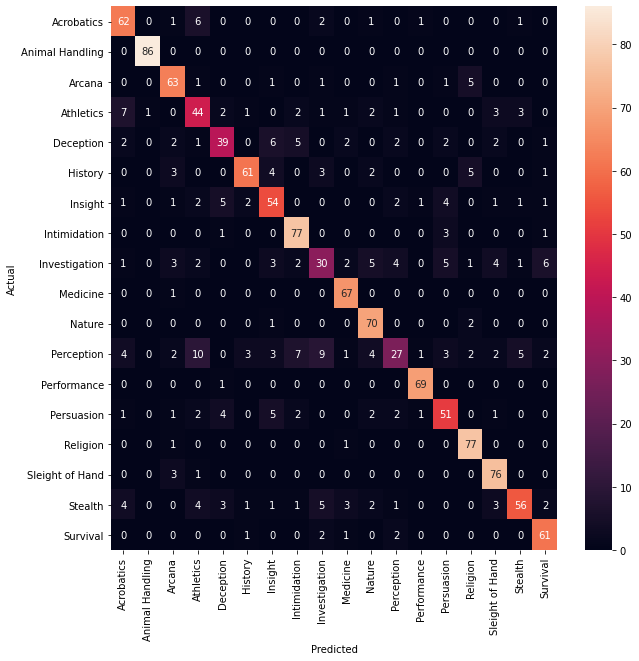

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=skill_arr, yticklabels=skill_arr)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
y_test.value_counts()

Animal Handling    86
Stealth            86
Perception         85
Intimidation       82
Sleight of Hand    80
History            79
Religion           79
Insight            75
Acrobatics         74
Arcana             73
Nature             73
Persuasion         72
Performance        70
Investigation      69
Medicine           68
Athletics          68
Survival           67
Deception          64
Name: skill, dtype: int64

# Wordclouds + bag of words

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Fazer o wordcloud com base no df_estrat ao invés de df

def print_wordcloud(skill_name):
  skills_backward = df[df['skill'] == skill_name]
  document = ' '.join(skills_backward['backward_text'])

  wordcloud = WordCloud(background_color="white").generate(document)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  print(skill_name)

In [ ]:
def BOW(skill_name):
  skills_backward = df[df['skill'] == skill_name]
  backward_train, backward_test, skill_train, skill_test = train_test_split(skills_backward['backward_text'], skills_backward['skill'], random_state = 0)
  
  count_vect_skill = CountVectorizer()
  count_vect_skill.fit_transform(backward_train)
  print(count_vect_skill.get_feature_names())

Deception


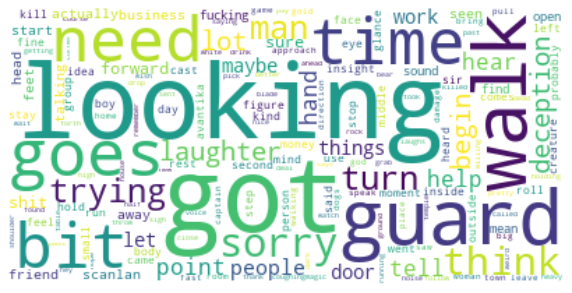

In [ ]:
print_wordcloud('Deception')

In [ ]:
BOW('Deception')

['able', 'accent', 'access', 'accidentally', 'acquire', 'act', 'action', 'actual', 'actually', 'addicted', 'adhesive', 'administrating', 'administrator', 'admit', 'adopt', 'adorns', 'advantage', 'advice', 'advisor', 'affordable', 'afraid', 'age', 'aggressive', 'ago', 'agree', 'agreed', 'ahead', 'ahem', 'aid', 'air', 'akin', 'alchemist', 'alcoholic', 'alcoves', 'ale', 'alert', 'alfield', 'allegiance', 'alley', 'alleys', 'allow', 'alms', 'alternative', 'amateurs', 'amazing', 'amber', 'amphitheater', 'ancient', 'angels', 'angrily', 'angry', 'angular', 'animals', 'ankles', 'anselm', 'answer', 'ante', 'anybody', 'anymore', 'anyting', 'anyways', 'apocalypse', 'apologize', 'apparently', 'appear', 'appearance', 'appears', 'appreciated', 'approach', 'approached', 'approaches', 'approaching', 'appropriate', 'appropriately', 'arc', 'arcane', 'archers', 'arches', 'archways', 'area', 'areas', 'arguing', 'argument', 'arm', 'armor', 'armored', 'arms', 'arranged', 'arrangement', 'arrest', 'arrived', '

Intimidation


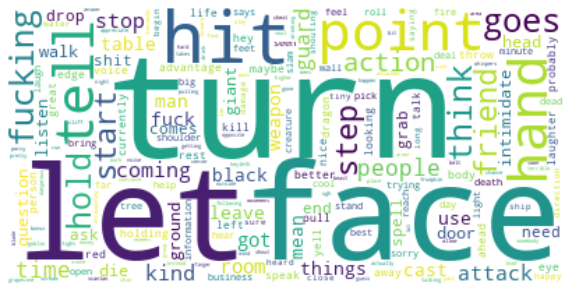

In [ ]:
print_wordcloud('Intimidation')

In [ ]:
BOW('Intimidation')

['ability', 'absolute', 'absolutely', 'access', 'accord', 'act', 'acting', 'action', 'actions', 'actually', 'adding', 'admit', 'advantage', 'ago', 'ahead', 'air', 'alarm', 'algar', 'alleyway', 'allies', 'allow', 'allows', 'amazing', 'angry', 'animal', 'ankle', 'anna', 'answer', 'answering', 'anti', 'anymore', 'appear', 'appears', 'applaud', 'apple', 'appreciate', 'approach', 'arby', 'area', 'areas', 'arguing', 'arm', 'armor', 'army', 'arrest', 'arrow', 'arschloch', 'ash', 'ask', 'asked', 'asking', 'asks', 'assages', 'asshole', 'assigned', 'assuming', 'astra', 'attached', 'attack', 'attacked', 'attacking', 'attempt', 'attention', 'attitude', 'attracted', 'aurra', 'authority', 'available', 'avantika', 'average', 'avoid', 'aware', 'away', 'awful', 'axe', 'aye', 'bad', 'bag', 'bakery', 'balanced', 'ball', 'balloon', 'bandaged', 'bar', 'barbarian', 'baseball', 'bassy', 'batman', 'battle', 'bear', 'beast', 'beauregard', 'bed', 'bedpan', 'bedraggled', 'begin', 'begins', 'believe', 'bellow', '

Performance


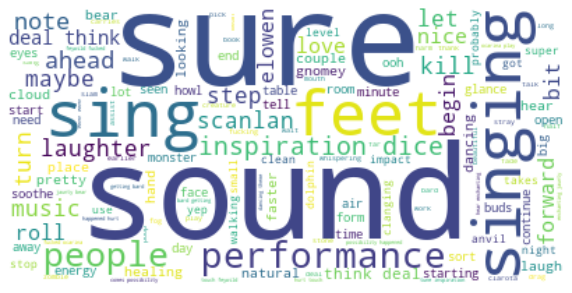

In [ ]:
print_wordcloud('Performance')

In [ ]:
BOW('Performance')

['abs', 'acquaintance', 'acrobatics', 'acting', 'action', 'actual', 'ahead', 'aimed', 'air', 'altar', 'alter', 'anvil', 'approached', 'areas', 'arm', 'armor', 'arms', 'arrested', 'arrow', 'artagan', 'ask', 'attempt', 'attention', 'audience', 'audio', 'autobiography', 'autopilot', 'avantika', 'avoid', 'away', 'awkward', 'backfire', 'badly', 'band', 'bard', 'bear', 'beautiful', 'begin', 'begins', 'best', 'bet', 'better', 'big', 'bird', 'bit', 'blowing', 'body', 'bonus', 'boof', 'book', 'bother', 'bow', 'break', 'breath', 'breathing', 'brief', 'brings', 'brochures', 'brought', 'buddies', 'buds', 'builds', 'bullet', 'bunch', 'business', 'cacophonous', 'careful', 'carnival', 'carries', 'carry', 'case', 'cast', 'center', 'centuries', 'certain', 'chains', 'challenging', 'chewing', 'chittering', 'city', 'clacking', 'clanging', 'clank', 'clanking', 'clarota', 'clean', 'cliff', 'cloud', 'coasting', 'coasts', 'coconut', 'coconuts', 'comes', 'coming', 'completely', 'connection', 'consequences', 'c

Persuasion


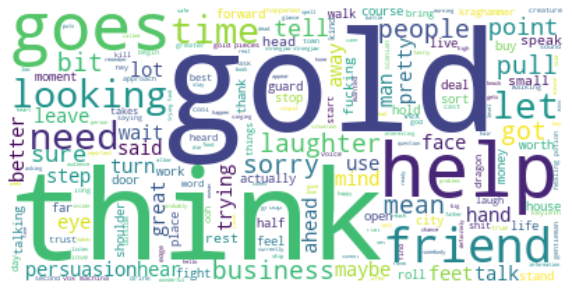

In [ ]:
print_wordcloud('Persuasion')

In [ ]:
BOW('Persuasion')

['abandon', 'abandoned', 'abandoning', 'ability', 'able', 'abraham', 'absolute', 'absolutely', 'absorbs', 'abuse', 'accent', 'accented', 'accident', 'accidentally', 'accompany', 'accused', 'accustomed', 'acquaintance', 'acquire', 'acres', 'act', 'acting', 'action', 'active', 'actual', 'actually', 'add', 'adding', 'addressing', 'adjoining', 'adjusts', 'adorably', 'adorned', 'advantage', 'adventure', 'adventurers', 'adventures', 'advice', 'advisors', 'aerial', 'affect', 'affiliated', 'affiliations', 'afraid', 'age', 'ago', 'agreeable', 'agreement', 'ahead', 'ahem', 'ahlia', 'aid', 'air', 'alchemy', 'alcoholics', 'ale', 'algar', 'aligned', 'alive', 'alley', 'allies', 'allow', 'allows', 'ally', 'alms', 'altar', 'amazed', 'amazing', 'ambushed', 'amounts', 'amulet', 'angry', 'animals', 'ank', 'ankles', 'anonymous', 'answer', 'answered', 'antiques', 'anxiously', 'anybody', 'anymore', 'ape', 'apiece', 'apologize', 'apparently', 'appealing', 'appear', 'appearance', 'appeared', 'appearing', 'app

Acrobatics


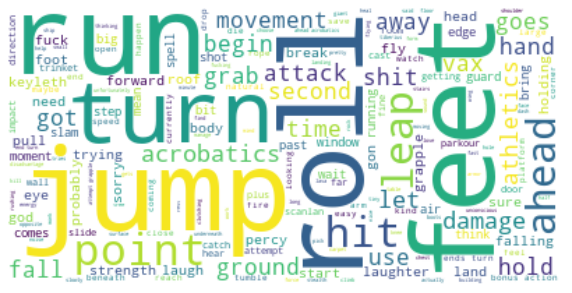

In [ ]:
print_wordcloud('Acrobatics')

In [ ]:
BOW('Acrobatics')

['ability', 'able', 'absolutely', 'acrobatics', 'action', 'actions', 'active', 'actual', 'actually', 'add', 'addition', 'additional', 'adhering', 'adjacent', 'advantage', 'affect', 'affected', 'aftertaste', 'aggression', 'aggressive', 'ahead', 'aid', 'air', 'alcove', 'alive', 'alleviate', 'alley', 'alleyway', 'allies', 'allow', 'alluring', 'alongside', 'alphabetical', 'amazing', 'angry', 'animal', 'answer', 'answered', 'anticipated', 'anybody', 'anymore', 'apart', 'appear', 'appearing', 'approach', 'approaching', 'arc', 'arcane', 'archer', 'archers', 'arcs', 'area', 'arguably', 'arm', 'armor', 'arms', 'arrow', 'ashari', 'ask', 'asking', 'ass', 'asses', 'assist', 'assisting', 'asum', 'athletics', 'attached', 'attaches', 'attack', 'attacks', 'attempt', 'attempting', 'attempts', 'attention', 'attracted', 'autobiography', 'avantika', 'average', 'avoid', 'awake', 'aware', 'away', 'awesome', 'axe', 'backflip', 'backhand', 'backing', 'backs', 'backswing', 'backward', 'bad', 'balance', 'balanc

Sleight of Hand


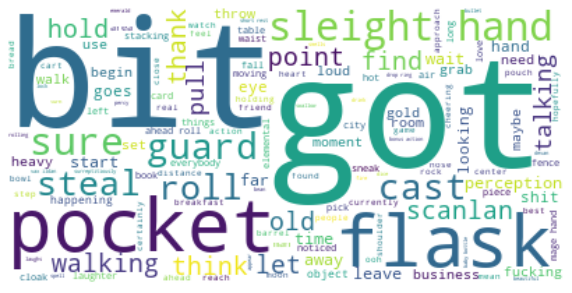

In [ ]:
print_wordcloud('Sleight of Hand')

In [ ]:
BOW('Sleight of Hand')

['accessible', 'accompany', 'acid', 'action', 'actual', 'actually', 'add', 'advantage', 'ago', 'ahead', 'air', 'angeles', 'ante', 'anvil', 'appear', 'approach', 'area', 'army', 'arrivals', 'art', 'asleep', 'ass', 'assholes', 'assume', 'attach', 'attached', 'attack', 'attention', 'attuning', 'away', 'baby', 'bag', 'baked', 'ball', 'barkeep', 'barrel', 'base', 'baubles', 'bean', 'bearings', 'beating', 'beautiful', 'bed', 'begin', 'beginning', 'begins', 'bell', 'belongings', 'belt', 'bend', 'beneath', 'best', 'big', 'bigby', 'bigger', 'bit', 'bitch', 'black', 'bleeding', 'blow', 'blue', 'bonus', 'boob', 'book', 'books', 'bottle', 'bowl', 'brass', 'bread', 'break', 'breakfast', 'breaking', 'breathing', 'brick', 'briefly', 'broken', 'bubble', 'building', 'bullet', 'bullets', 'business', 'busted', 'buttcheek', 'cajoling', 'cali', 'came', 'camera', 'cantrip', 'card', 'cards', 'care', 'cart', 'carved', 'carvers', 'case', 'casies', 'cast', 'caster', 'cat', 'caught', 'center', 'certainly', 'chag

Stealth


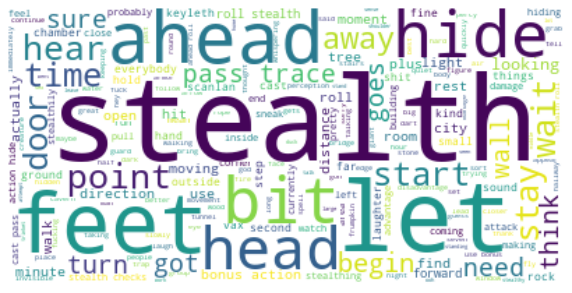

In [ ]:
print_wordcloud('Stealth')

In [ ]:
BOW('Stealth')

['ability', 'able', 'abode', 'abominations', 'aboriginals', 'absolute', 'academy', 'accident', 'account', 'acid', 'acidity', 'acrobatics', 'act', 'action', 'actions', 'activate', 'active', 'actively', 'activity', 'actual', 'actually', 'adams', 'add', 'added', 'adding', 'addition', 'additional', 'adds', 'adhered', 'adjacent', 'admonishment', 'adopted', 'adr', 'advanced', 'advantage', 'advantageous', 'adventure', 'aerial', 'aesthetic', 'affix', 'affixed', 'afraid', 'agents', 'ages', 'aggressive', 'ago', 'agree', 'agreed', 'ahead', 'aid', 'aiding', 'ailments', 'aimed', 'air', 'alarm', 'alarms', 'alchemist', 'ale', 'alive', 'alley', 'alleyway', 'allies', 'allison', 'allow', 'allowed', 'allows', 'ally', 'aloft', 'alter', 'aluminum', 'amazing', 'amazon', 'ambush', 'amorphous', 'amphitheater', 'amuses', 'anastasia', 'anchor', 'ancient', 'andy', 'angle', 'angry', 'animal', 'anti', 'anticipation', 'anxiously', 'anybody', 'anymore', 'apart', 'apologize', 'apparently', 'appear', 'appeared', 'appe

Arcana


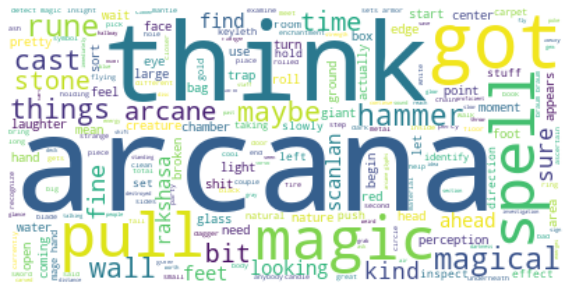

In [ ]:
print_wordcloud('Arcana')

In [ ]:
BOW('Arcana')

['aback', 'abilities', 'ability', 'able', 'accident', 'accidentally', 'action', 'activate', 'activity', 'acts', 'actual', 'actually', 'add', 'addition', 'adjacent', 'adorns', 'advantage', 'affect', 'affixed', 'aghast', 'ago', 'ahead', 'ahem', 'aid', 'aim', 'air', 'airport', 'algar', 'alive', 'aloft', 'amaranthine', 'amazing', 'ambassador', 'ample', 'angel', 'angle', 'animals', 'anna', 'annihilation', 'anvil', 'anybody', 'anymore', 'apart', 'apparently', 'appearing', 'appears', 'approach', 'approved', 'arcana', 'arcane', 'area', 'arm', 'armed', 'armor', 'arms', 'arranged', 'arrow', 'arrows', 'art', 'ascending', 'ascertain', 'ash', 'ashes', 'aside', 'ask', 'ass', 'assault', 'assaulting', 'attached', 'attempt', 'attempts', 'attune', 'aura', 'authority', 'aware', 'away', 'awful', 'backlight', 'bad', 'bag', 'balcony', 'ball', 'bana', 'banana', 'bands', 'base', 'based', 'basis', 'beach', 'bead', 'beans', 'beasts', 'beautiful', 'bedrooms', 'begin', 'begins', 'belt', 'big', 'bigger', 'bit', 'b

History


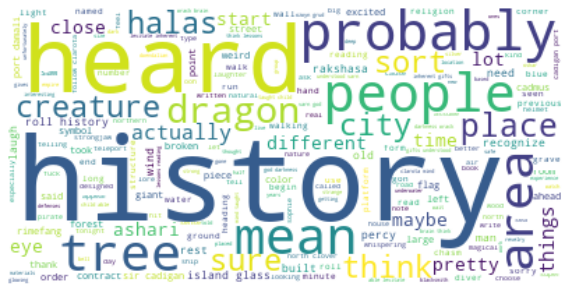

In [ ]:
print_wordcloud('History')

In [ ]:
BOW('History')

['able', 'access', 'actual', 'actually', 'adama', 'add', 'addition', 'advantage', 'afar', 'afterward', 'ago', 'ahead', 'ahh', 'air', 'airship', 'alchemist', 'alive', 'amazing', 'ancient', 'angular', 'anniversaries', 'answers', 'anybody', 'apologies', 'apparently', 'appear', 'appreciation', 'approaches', 'approved', 'arcana', 'arcane', 'archibald', 'area', 'areas', 'armed', 'armor', 'army', 'arranged', 'ashari', 'ask', 'asking', 'aspects', 'assault', 'assemble', 'associated', 'assume', 'atop', 'attack', 'avantika', 'aware', 'away', 'background', 'backlight', 'bad', 'badass', 'balls', 'band', 'banks', 'barricade', 'based', 'battlestar', 'beasts', 'beauty', 'begin', 'begun', 'bel', 'belfry', 'bell', 'bells', 'belonged', 'beneath', 'berth', 'best', 'better', 'big', 'bit', 'black', 'blacksmith', 'blade', 'block', 'blocked', 'blocks', 'blood', 'bloodline', 'blooming', 'blue', 'blues', 'boat', 'bodies', 'bolt', 'book', 'books', 'booky', 'border', 'bosoms', 'bothering', 'bought', 'boundaries',

Investigation


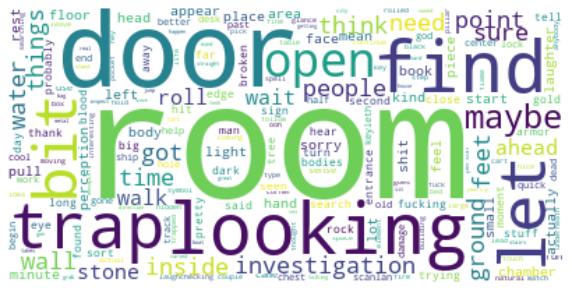

In [ ]:
print_wordcloud('Investigation')

In [ ]:
BOW('Investigation')

['abandoned', 'ability', 'abjuration', 'able', 'absent', 'absolutely', 'absorbed', 'access', 'accompany', 'accompanying', 'accomplish', 'accomplished', 'accordioned', 'accounts', 'accumulation', 'acidic', 'acknowledging', 'acquires', 'act', 'action', 'actively', 'actual', 'actually', 'adam', 'adamant', 'adding', 'additional', 'admire', 'adornments', 'advantage', 'adventurer', 'adventures', 'afar', 'affected', 'affixed', 'affordable', 'afraid', 'agape', 'age', 'aged', 'agility', 'ago', 'agree', 'agreed', 'ahead', 'ahlia', 'aid', 'aiding', 'aim', 'air', 'ajar', 'akin', 'alarm', 'alcove', 'alcoves', 'alexander', 'algae', 'alive', 'allegiance', 'alley', 'allhammer', 'allow', 'allowance', 'aloft', 'alongside', 'alright', 'altar', 'alter', 'amazing', 'amiss', 'ammunition', 'amounts', 'amphala', 'anchored', 'ancient', 'angle', 'animal', 'animals', 'animated', 'ank', 'ankle', 'ankles', 'answer', 'antiqued', 'anybody', 'anymore', 'apart', 'apex', 'apologize', 'apparate', 'apparates', 'apparatin

Nature


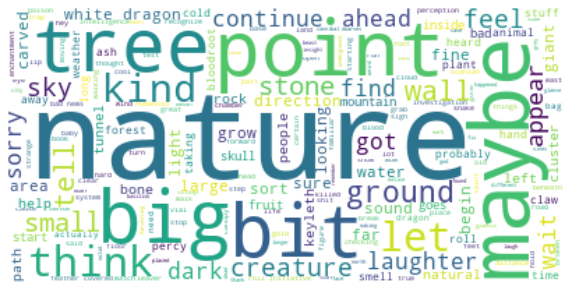

In [ ]:
print_wordcloud('Nature')

In [ ]:
BOW('Nature')

['able', 'abrasive', 'accessible', 'accurate', 'acid', 'acidic', 'acknowledged', 'active', 'activity', 'actual', 'actually', 'added', 'adjust', 'advantage', 'adventure', 'affectation', 'afraid', 'afternoon', 'ahead', 'ahlia', 'aid', 'aim', 'alcove', 'alive', 'amicable', 'animal', 'animals', 'animus', 'antagonistic', 'anthill', 'apart', 'aplenty', 'appear', 'appearance', 'appears', 'approach', 'approximately', 'aquamarine', 'arcana', 'arcane', 'area', 'arrival', 'arrived', 'ash', 'ashamed', 'ashari', 'ask', 'asking', 'aspects', 'assist', 'assume', 'astute', 'asunder', 'atmosphere', 'attack', 'attempt', 'attempted', 'attention', 'available', 'awake', 'away', 'awesome', 'awesomeness', 'awful', 'aye', 'baby', 'backpack', 'bad', 'bag', 'ball', 'bar', 'barely', 'barkeep', 'barrel', 'base', 'based', 'basic', 'basilisk', 'basilisks', 'beach', 'beaks', 'beams', 'bear', 'beard', 'beast', 'beasts', 'beautiful', 'bed', 'begin', 'beginning', 'begins', 'begun', 'belies', 'believe', 'belt', 'ben', 'b

Religion


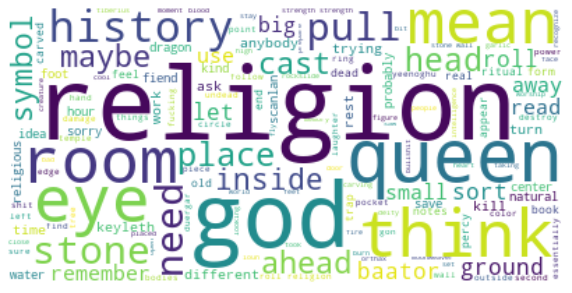

In [ ]:
print_wordcloud('Religion')

In [ ]:
BOW('Religion')

['able', 'abyss', 'according', 'acolytes', 'action', 'actual', 'actually', 'advantage', 'ago', 'agree', 'ahead', 'airway', 'ale', 'allegiance', 'alleyway', 'allhammer', 'allow', 'alphabet', 'altar', 'ambushed', 'ancient', 'angry', 'animal', 'animalistically', 'anime', 'anybody', 'apologize', 'apparently', 'appear', 'appears', 'approach', 'arbiter', 'arcana', 'arcane', 'area', 'armored', 'army', 'array', 'artifacts', 'ascended', 'aside', 'ask', 'asking', 'assist', 'atop', 'attack', 'attacks', 'attempt', 'attention', 'auto', 'aware', 'away', 'awoke', 'baator', 'bad', 'bahamut', 'banks', 'banners', 'bard', 'barista', 'barrel', 'barreled', 'base', 'based', 'bases', 'basilisk', 'bat', 'batch', 'battle', 'bay', 'bear', 'beast', 'beasts', 'beat', 'beating', 'beautiful', 'begin', 'beginning', 'bell', 'beneath', 'better', 'big', 'bird', 'bit', 'black', 'blackened', 'blade', 'blasting', 'blessed', 'blind', 'blocking', 'blocky', 'blood', 'bodies', 'body', 'bone', 'bones', 'book', 'books', 'boots'

Athletics


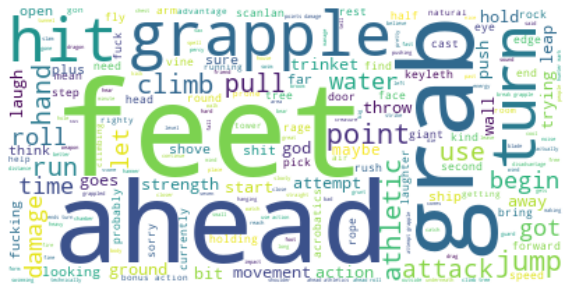

In [ ]:
print_wordcloud('Athletics')

In [ ]:
BOW('Athletics')

['ability', 'able', 'absolute', 'absolutely', 'access', 'accoutrements', 'accrued', 'acid', 'acrobatics', 'acting', 'action', 'actions', 'actual', 'actually', 'add', 'additional', 'adjacent', 'adjust', 'adorable', 'advance', 'advantage', 'adventurer', 'affixed', 'agreed', 'ahead', 'ahhh', 'aid', 'aide', 'aim', 'air', 'alcove', 'algae', 'alive', 'alleviated', 'alligator', 'allow', 'alphabetical', 'amazing', 'ammunition', 'anchor', 'angle', 'angrily', 'angry', 'anime', 'ank', 'ankles', 'announce', 'answers', 'anybody', 'apart', 'ape', 'apes', 'apparently', 'appear', 'appears', 'apply', 'appreciate', 'approach', 'approximately', 'arb', 'arburuk', 'arby', 'arc', 'arcane', 'archer', 'archways', 'area', 'arkhan', 'arm', 'armor', 'arms', 'arresting', 'arrow', 'artists', 'ask', 'ass', 'assault', 'assuming', 'athletic', 'athletics', 'attach', 'attached', 'attack', 'attacked', 'attacking', 'attacks', 'attempt', 'attempted', 'attempting', 'attempts', 'attention', 'attractive', 'aurra', 'available

Animal Handling


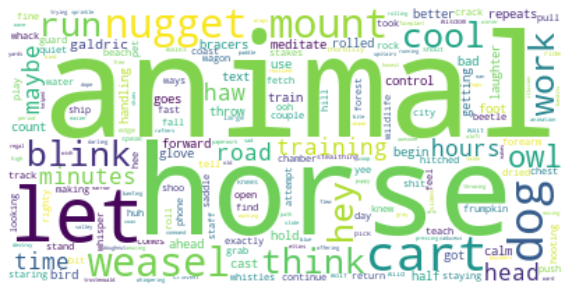

In [ ]:
print_wordcloud('Animal Handling')

In [ ]:
BOW('Animal Handling')

['able', 'acrobatics', 'add', 'advantage', 'ahead', 'amazing', 'animal', 'animals', 'animation', 'appear', 'apples', 'attempt', 'awesome', 'bad', 'balloon', 'bamfing', 'bandits', 'based', 'beach', 'beast', 'beetle', 'beetles', 'begin', 'bereft', 'bet', 'better', 'biggest', 'bipedal', 'bird', 'birds', 'bit', 'bite', 'bits', 'blade', 'blink', 'blood', 'blue', 'bond', 'boulders', 'bracers', 'brief', 'briefly', 'bringing', 'buddy', 'business', 'caduceus', 'calm', 'campsite', 'carefully', 'cart', 'cast', 'chamber', 'cheek', 'chest', 'chirps', 'city', 'climb', 'clomp', 'coast', 'coat', 'comes', 'command', 'considerate', 'continue', 'continues', 'control', 'cool', 'coop', 'count', 'counting', 'counts', 'couple', 'cover', 'crack', 'craven', 'crisp', 'currently', 'cute', 'damn', 'darling', 'day', 'days', 'defense', 'destroy', 'diaphragm', 'direction', 'dismount', 'disney', 'distance', 'dog', 'doggies', 'domesticated', 'door', 'dope', 'double', 'doughnut', 'draw', 'dried', 'drive', 'driving', 'd

Insight


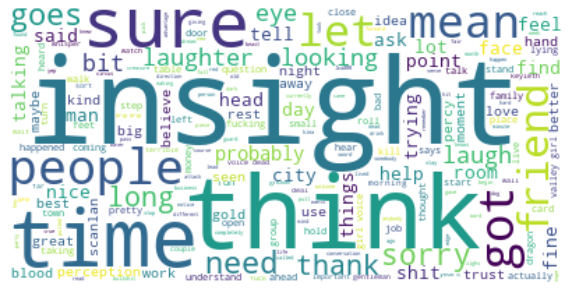

In [ ]:
print_wordcloud('Insight')

In [ ]:
BOW('Insight')

['abdomen', 'ability', 'able', 'abode', 'absolute', 'abundant', 'accent', 'access', 'accidentally', 'accounted', 'accusations', 'acid', 'acolytes', 'acquaintance', 'acquire', 'act', 'acting', 'action', 'actions', 'actually', 'add', 'added', 'addicted', 'admitted', 'adrenaline', 'adults', 'advance', 'advantage', 'adventure', 'adventurer', 'advice', 'affected', 'afford', 'affordable', 'afraid', 'afternoon', 'ago', 'agony', 'agree', 'agreed', 'ahead', 'air', 'alarmed', 'alcohol', 'ale', 'alibi', 'aligned', 'alignment', 'alive', 'allegiance', 'alleviate', 'alleyway', 'alliances', 'allies', 'allowed', 'allows', 'allura', 'alongside', 'alright', 'alter', 'amaranthine', 'amazing', 'amounts', 'amusing', 'anastasia', 'angels', 'angle', 'angles', 'angry', 'animal', 'animalistically', 'animlae', 'ankles', 'answer', 'answering', 'answers', 'anxiousness', 'anybody', 'anymore', 'apart', 'apex', 'apologies', 'appalling', 'appallingly', 'apparent', 'apparently', 'appear', 'appears', 'applause', 'appre

Medicine


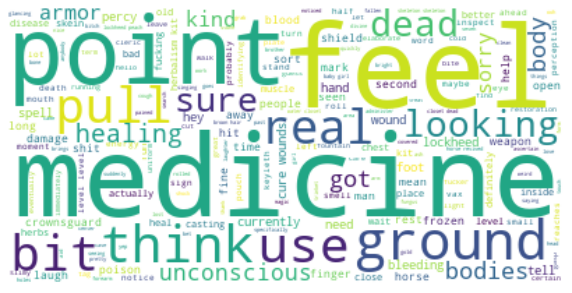

In [ ]:
print_wordcloud('Medicine')

In [ ]:
BOW('Medicine')

['ability', 'abs', 'accidentally', 'action', 'activity', 'actually', 'administer', 'administering', 'administers', 'advantage', 'ahead', 'aid', 'ailment', 'algar', 'alive', 'allura', 'angry', 'antiqued', 'antitoxin', 'anybody', 'anymore', 'apologize', 'appear', 'appendages', 'apples', 'apply', 'approach', 'area', 'arm', 'armor', 'arms', 'army', 'arrow', 'ascertain', 'ash', 'asleep', 'aspects', 'assume', 'ate', 'attached', 'attack', 'attention', 'average', 'away', 'baby', 'bad', 'bandage', 'bandages', 'bar', 'barely', 'barrel', 'barrels', 'bart', 'base', 'basement', 'basic', 'battle', 'bearer', 'beauty', 'begin', 'beneath', 'best', 'bestowing', 'bet', 'better', 'biceps', 'big', 'bip', 'bit', 'bitch', 'bite', 'bites', 'bits', 'black', 'blacksmithy', 'blade', 'bleeding', 'blessing', 'blintzes', 'blood', 'bloodied', 'bodies', 'body', 'bolts', 'bone', 'boy', 'break', 'breakfast', 'briarwood', 'bright', 'brighter', 'brings', 'brother', 'brown', 'bruise', 'bruised', 'buckle', 'bud', 'bunch', 

Perception


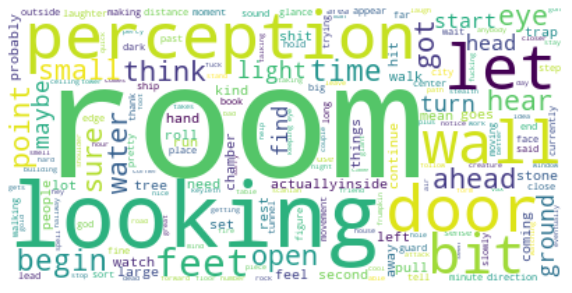

In [ ]:
print_wordcloud('Perception')

In [ ]:
BOW('Perception')

['aasimar', 'aback', 'abadar', 'abandoned', 'abbott', 'abilities', 'ability', 'able', 'aboard', 'abode', 'abrupt', 'abruptly', 'absolutely', 'absolved', 'academy', 'accent', 'accept', 'access', 'accidentally', 'accidents', 'accompany', 'accord', 'accoutrement', 'accurate', 'ace', 'acid', 'acknowledge', 'acknowledges', 'acolytes', 'acrid', 'acrobatics', 'act', 'action', 'actions', 'activate', 'active', 'actively', 'activity', 'actual', 'actually', 'add', 'addict', 'adding', 'addition', 'additional', 'adds', 'adelaine', 'adjacent', 'adjust', 'adler', 'admire', 'admit', 'adorn', 'adorned', 'adorning', 'adorns', 'adult', 'advance', 'advantage', 'adventurefury', 'adventurers', 'adventures', 'aerial', 'aerwin', 'affect', 'affected', 'affiliated', 'affixed', 'afraid', 'afterglow', 'afternoon', 'age', 'aged', 'ages', 'aggro', 'aghast', 'ago', 'agree', 'agreed', 'ahead', 'ahlia', 'aid', 'aiding', 'aim', 'air', 'aired', 'airflow', 'airship', 'airy', 'aisle', 'ajar', 'akin', 'alabaster', 'alarm',

Survival


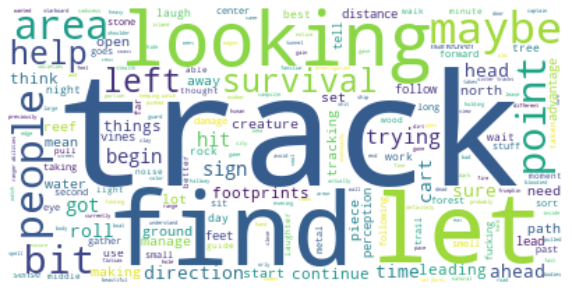

In [ ]:
print_wordcloud('Survival')

In [ ]:
BOW('Survival')

['aberrations', 'abilities', 'ability', 'able', 'acid', 'actively', 'actually', 'add', 'added', 'adding', 'adjacent', 'advantage', 'advantages', 'age', 'aggression', 'ahead', 'ahlia', 'aim', 'aimlessly', 'air', 'alarm', 'allegedly', 'alley', 'alleyway', 'amazing', 'anger', 'ank', 'anybody', 'appearance', 'appears', 'approaching', 'arcane', 'arcanum', 'architecture', 'arcing', 'arcs', 'area', 'areas', 'arguing', 'armature', 'armatures', 'armor', 'arrested', 'arrows', 'art', 'ash', 'ashy', 'asking', 'assume', 'attached', 'attack', 'attempt', 'attention', 'attest', 'avoid', 'awareness', 'away', 'awful', 'aww', 'backgrounds', 'backstory', 'backtrack', 'bad', 'badger', 'ball', 'bane', 'bank', 'barely', 'bars', 'base', 'based', 'basically', 'battle', 'bear', 'beautiful', 'begin', 'begins', 'believe', 'belonged', 'belongings', 'bench', 'beneath', 'bent', 'berleben', 'best', 'bet', 'better', 'big', 'biped', 'bit', 'bits', 'blanket', 'bloodied', 'blue', 'boat', 'bodies', 'body', 'bolts', 'bone'

#TODO


1.   Fazer bag of words para cada Skill/wordcloud (antes de diminuir o número de linhas) **FEITO**
2.   Printar a matriz de confusão: heatmap do previsto x realizado **FEITO**
3.   Usar o steamming do Spacy, basicamente usar o radical das palavras, retirando plurais e conjugações.
1.   Treinar o classificador adicionando os textos da planilha SKILL DB / Testar a acurácia com eles **FEITO** 
1.   Reduzir o número de linhas usados como backward_text para verificar se melhora as palavras
4.   Usar o Spacy para filtrar apenas verbos e substantivos
5.   Com o bag of words tentar diferentes percentuais acumulados para construir as features com as palavras mais comuns para cada skill. Faz a limpeza do ruído e mantem apenas o sinal.

TO DOs
Lista de atividades pendentes para refinar o modelo e o pipeline, sem uma ordem específica:

Abrigar o código no git hub e abrir esses pontos de melhoria como issues que vamos baixando utilizando pull requests

Testar outros tipos de modelo (decision tree, random forest e NN - Neural Networks costumam ter um bom desempenho neste tipo de problema)

Ajustar a chamada da predição para trabalhar com a string com os mesmos tratamentos utilizados no treino (deve melhorar a eficiência)

Aumentar a quantidade de dados para treino

Separar o pipeline em scrapping (por fonte de dados), data prep (por fonte de dados), enrichment (combinação das fontes de dados), treino do modelo, escoragem e validação do modelo

Verificar uma forma mais elegante de passar / criar stopwords em grande volume no Spacy

Fazer análise de wordcloud utilizando os dados de treinamento

Fazer análise de bag of words utilizando os dados de treinamento

Fazer análise de bag of words com percentil acumulado de ocorrências (separar ruído de sinal) nas palavras que irão para o treinamento, colocar um ponto de corte

Testar modelo com menos linhas de texto do transcript, analisar se melhora o modelo.

Testar pegar apenas verbos e substantivos (POS - Part of Speech) com o Spacy, analisar se o modelo melhora

Testar lemmatização utilizando o Spacy, analisar se o modelo melhora.

Testar iterar pela parse tree do Spacy, testar se os ngramas (combinação de palavras que aparecem juntas) melhoram o modelo.

Extração de NER (nomes de players) utilizando o Spacy

ref. https://spacy.io/usage/linguistic-features